In [6]:
from IPython import get_ipython
from IPython.display import display
import gym,cv2
import pickle as pkl
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

In [3]:
cliffenv=gym.make("CliffWalking-v0")

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:
q_table=pkl.load(open("q_learning_q_table.pkl","rb"))

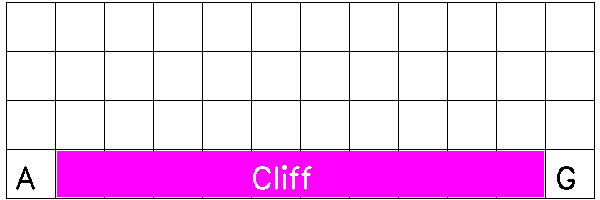

/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


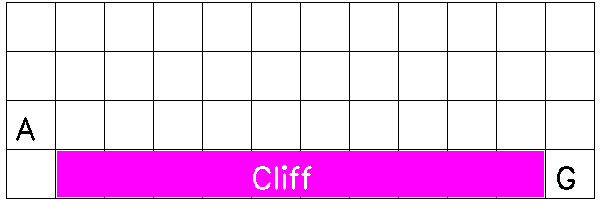

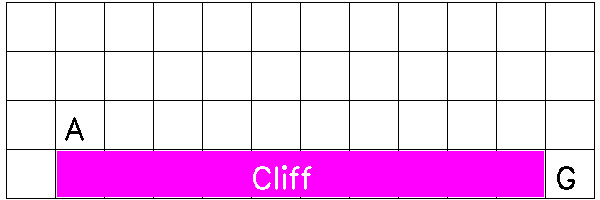

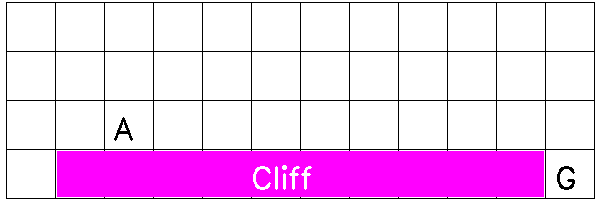

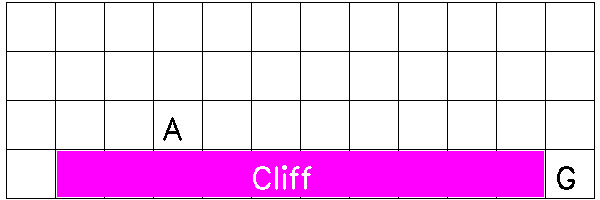

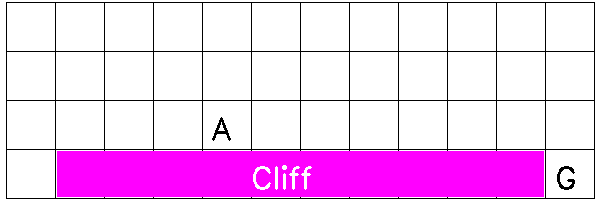

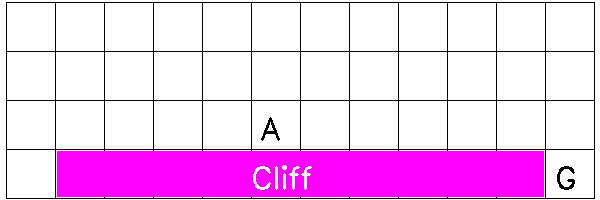

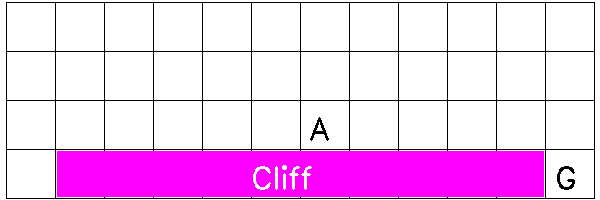

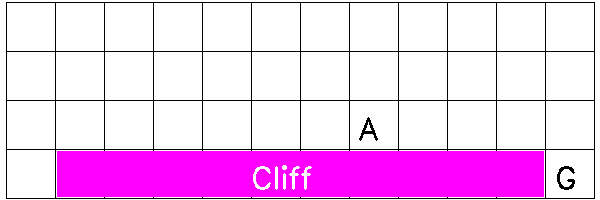

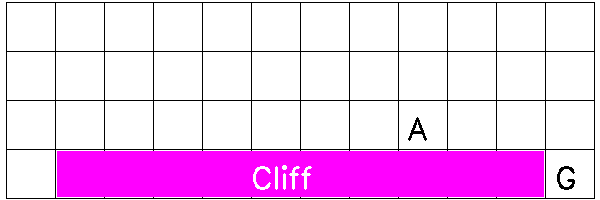

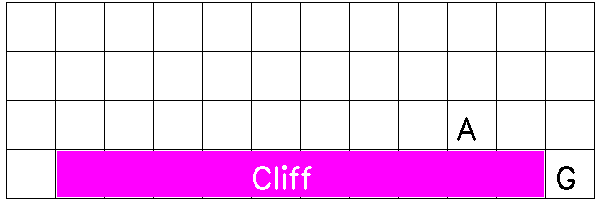

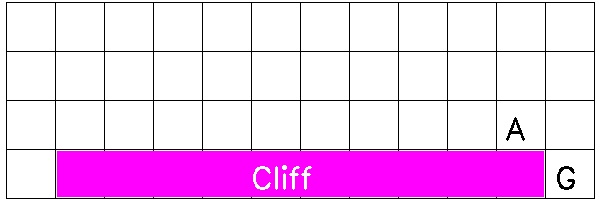

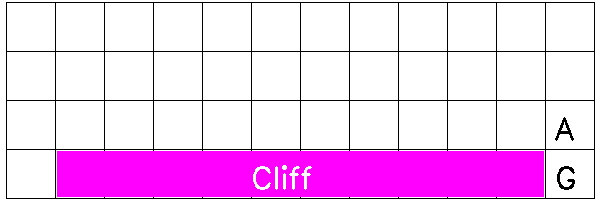

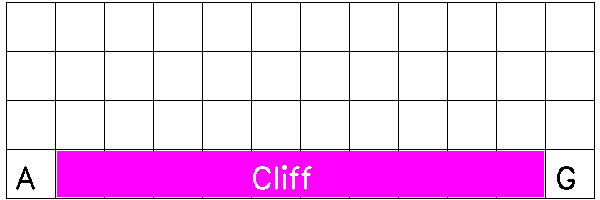

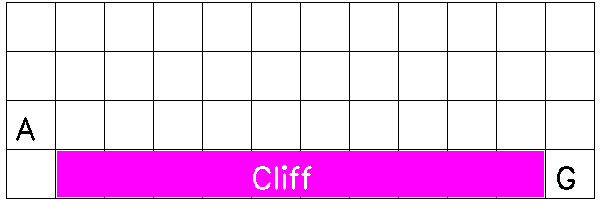

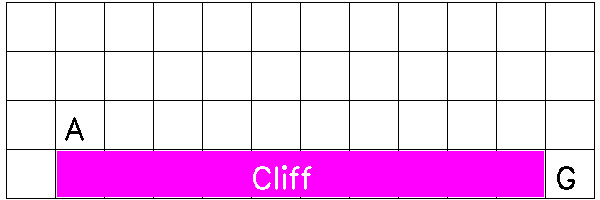

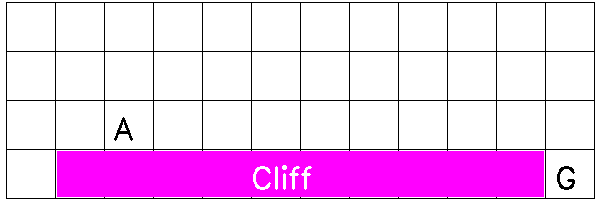

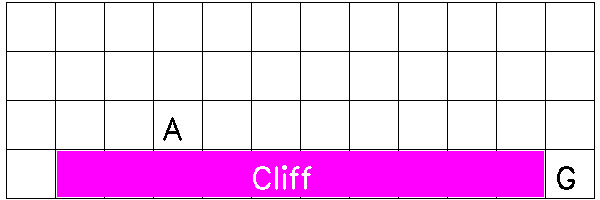

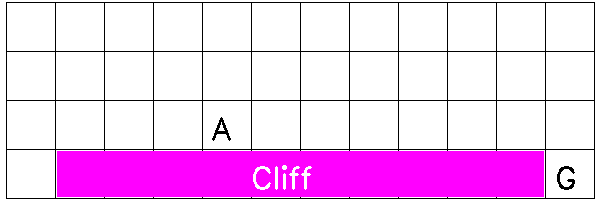

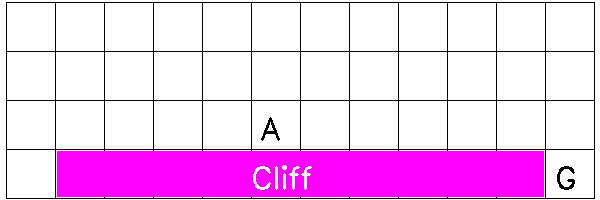

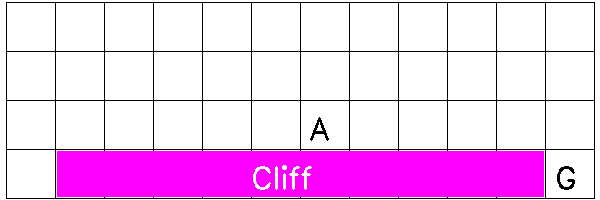

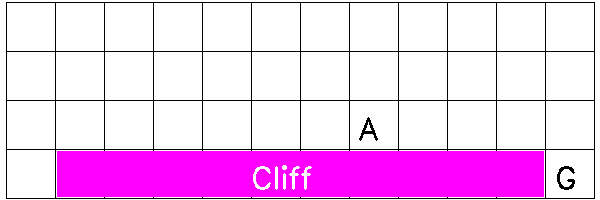

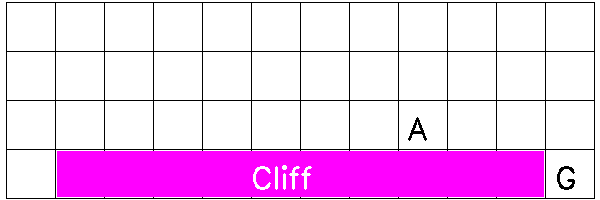

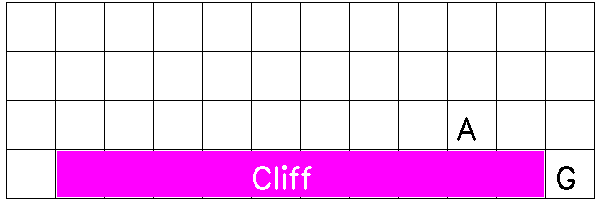

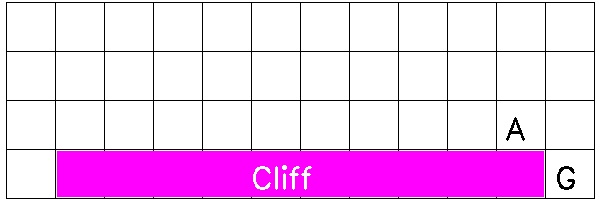

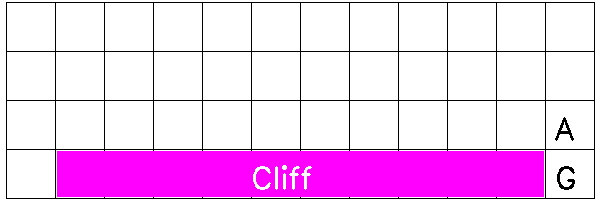

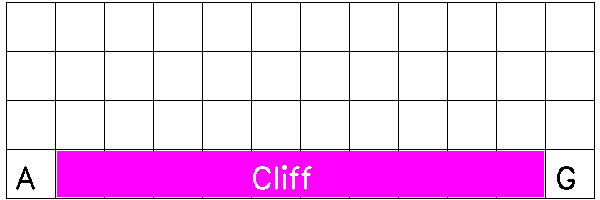

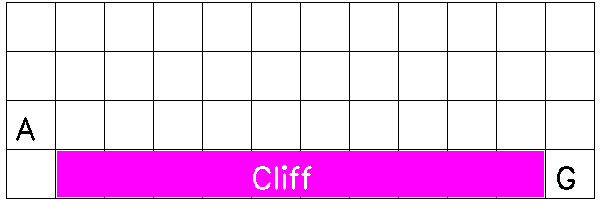

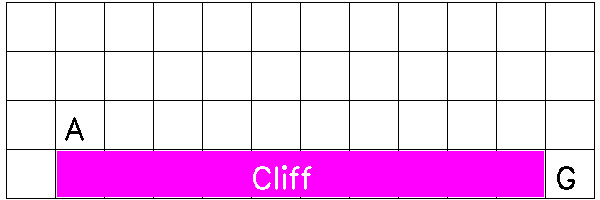

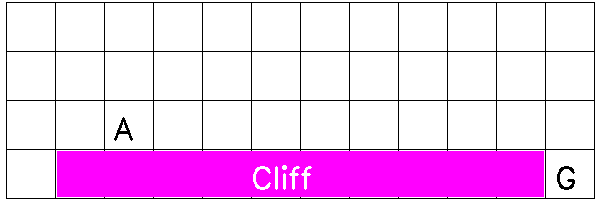

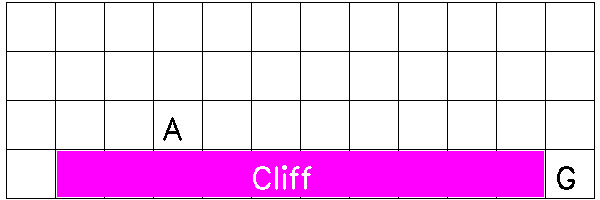

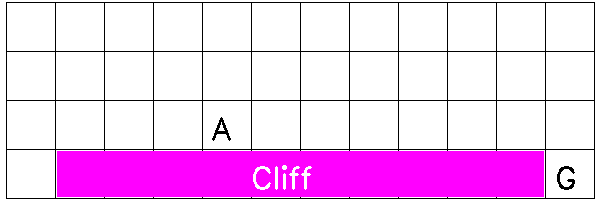

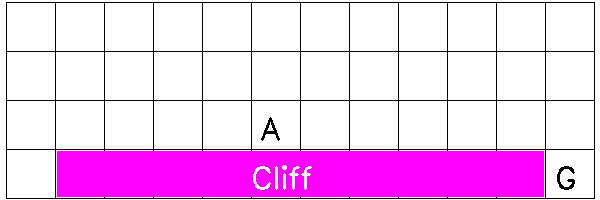

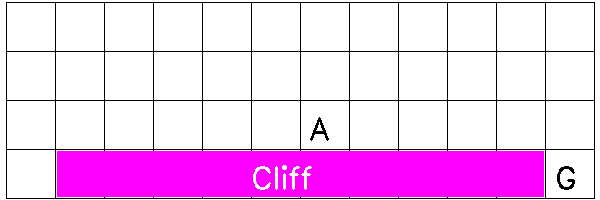

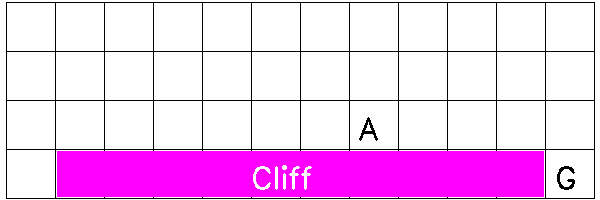

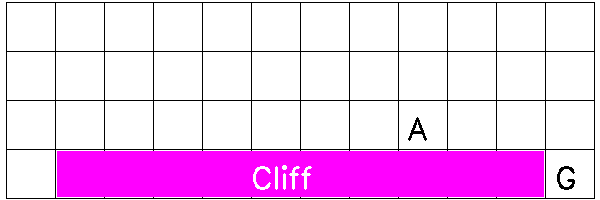

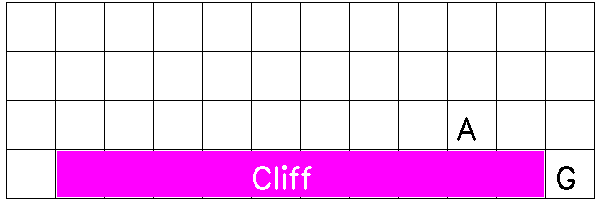

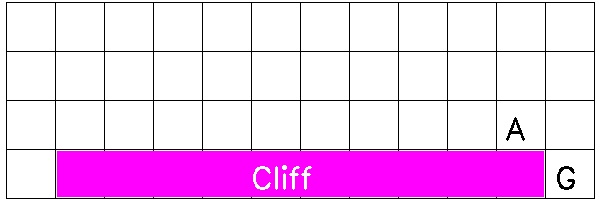

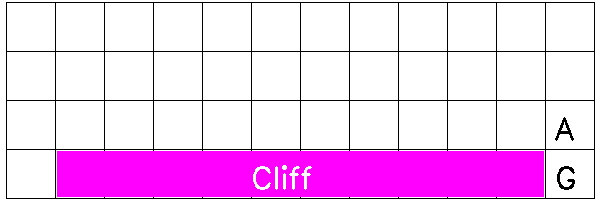

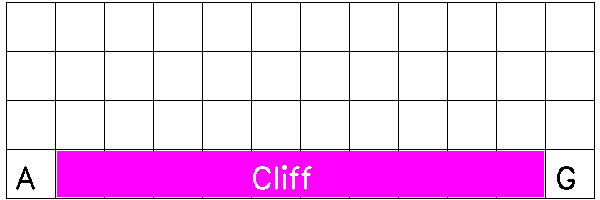

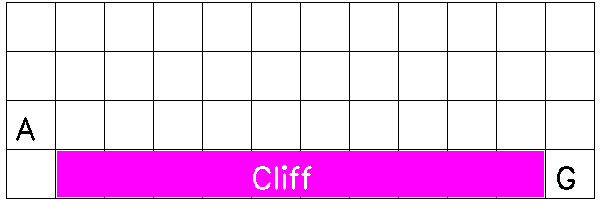

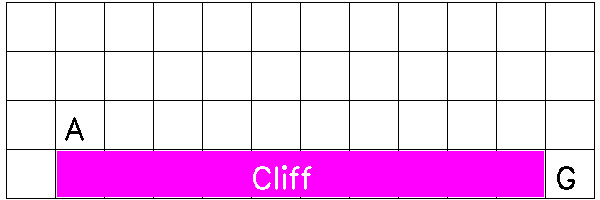

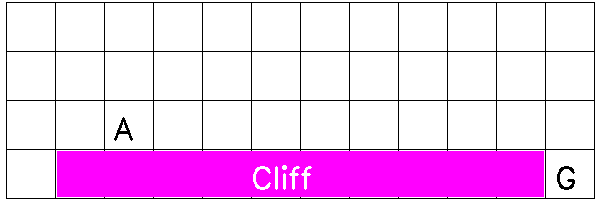

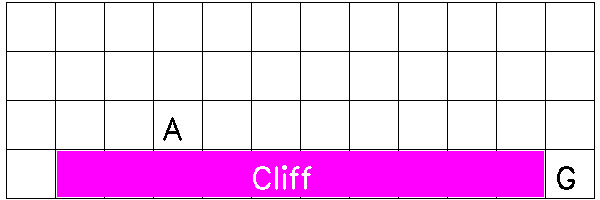

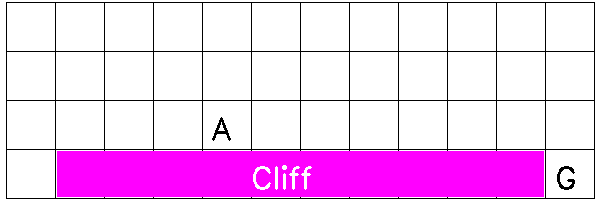

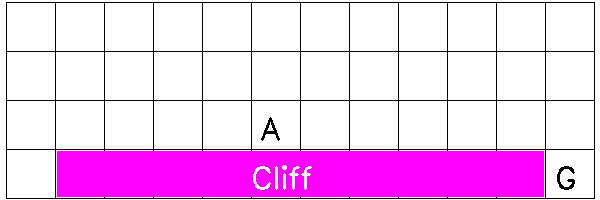

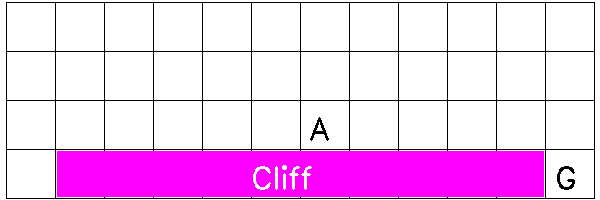

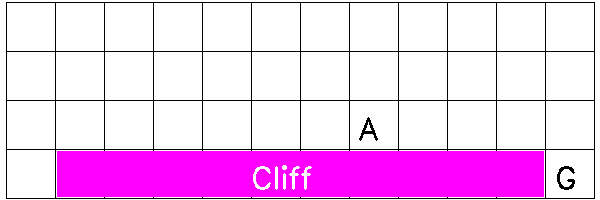

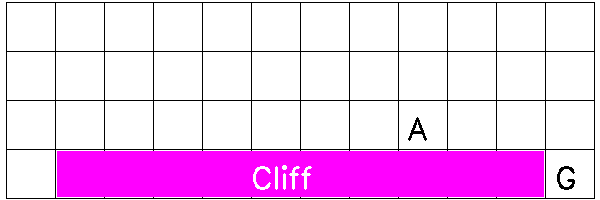

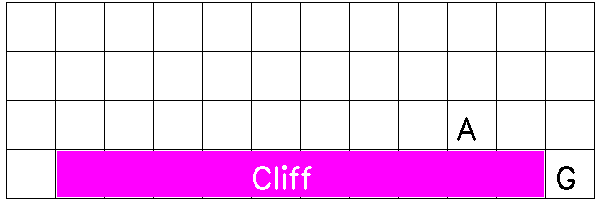

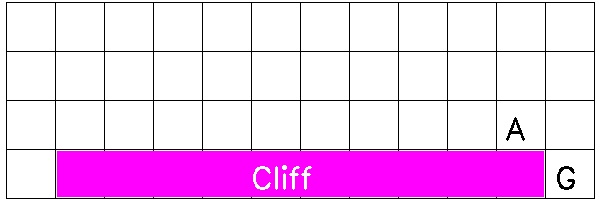

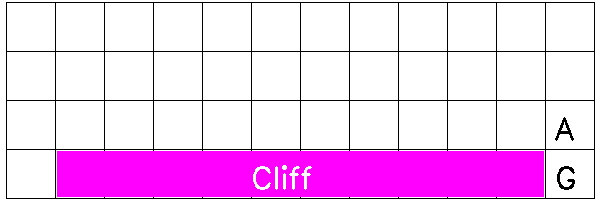

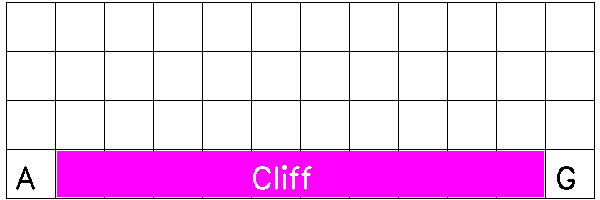

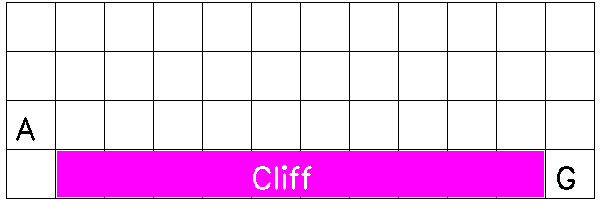

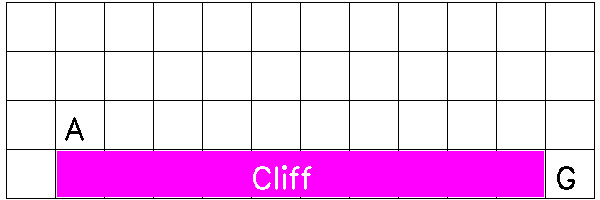

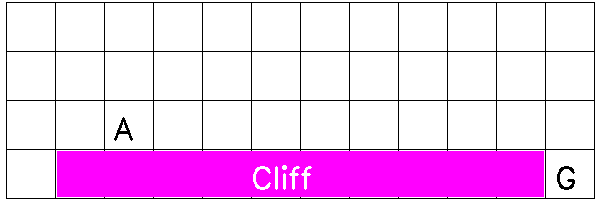

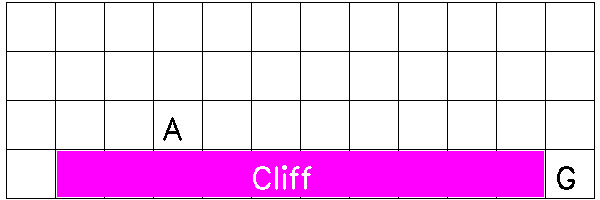

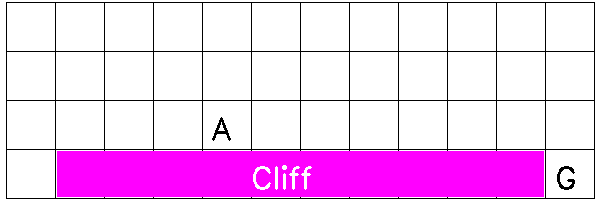

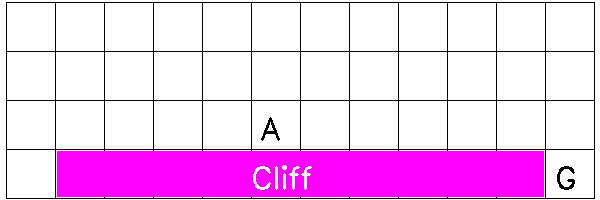

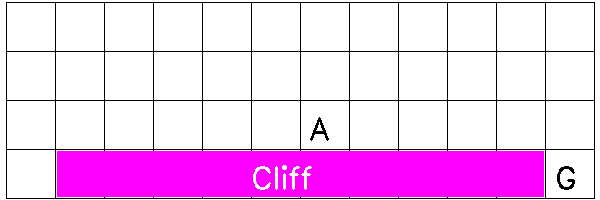

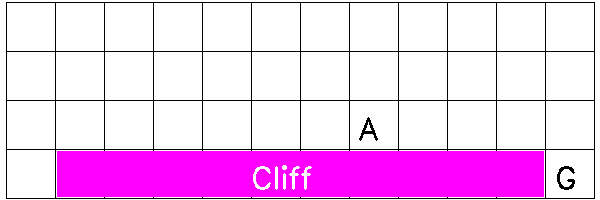

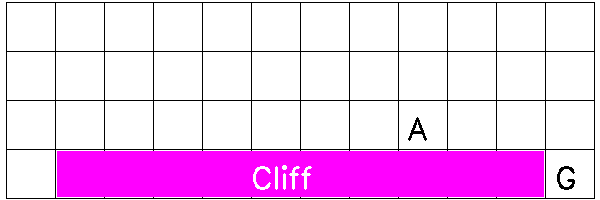

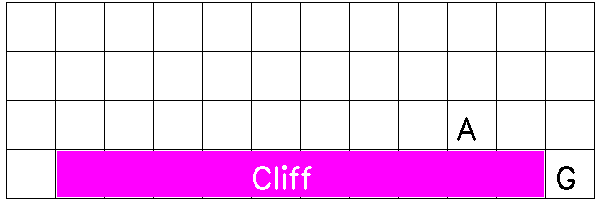

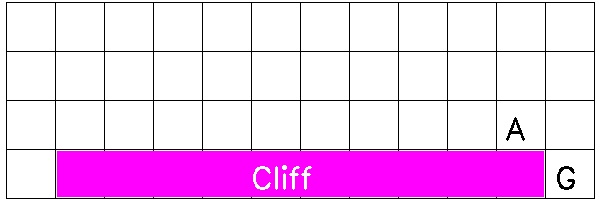

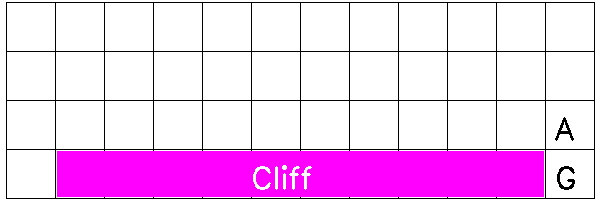

In [9]:
def initialize_frame():
    width, height = 600, 200
    img = np.ones(shape=(height, width, 3)) * 255.0
    margin_horizontal = 6
    margin_vertical = 2

    # Vertical Lines
    for i in range(13):
        img = cv2.line(img, (49 * i + margin_horizontal, margin_vertical),
                       (49 * i + margin_horizontal, 200 - margin_vertical), color=(0, 0, 0), thickness=1)

    # Horizontal Lines
    for i in range(5):
        img = cv2.line(img, (margin_horizontal, 49 * i + margin_vertical),
                       (600 - margin_horizontal, 49 * i + margin_vertical), color=(0, 0, 0), thickness=1)

    # Cliff Box
    img = cv2.rectangle(img, (49 * 1 + margin_horizontal + 2, 49 * 3 + margin_vertical + 2),
                        (49 * 11 + margin_horizontal - 2, 49 * 4 + margin_vertical - 2), color=(255, 0, 255),
                        thickness=-1)
    img = cv2.putText(img, text="Cliff", org=(49 * 5 + margin_horizontal, 49 * 4 + margin_vertical - 10),
                      fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

    # Goal
    frame = cv2.putText(img, text="G", org=(49 * 11 + margin_horizontal + 10, 49 * 4 + margin_vertical - 10),
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 0), thickness=2)
    # Start
    # frame = cv2.putText(img, text="S", org=(49 * 0 + margin_horizontal + 10, 49 * 4 + margin_vertical - 10),
    #                     fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 0), thickness=2)
    return frame


# puts the agent at a state
def put_agent(img, state):
    margin_horizontal = 6
    margin_vertical = 2
    row, column = np.unravel_index(indices=state, shape=(4, 12))
    cv2.putText(img, text="A", org=(49 * column + margin_horizontal + 10, 49 * (row + 1) + margin_vertical - 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 0), thickness=2)
    return img
def policy(state, explore=0.0):
    state = int(state)
    action = int(np.argmax(q_table[state]))
    if np.random.random() <= explore:
        action = int(np.random.randint(low=0, high=1, size=1))
    return action
NUM_EPISODES=5
for episode in range(NUM_EPISODES):
  done=False
  frame=initialize_frame()
  state=cliffenv.reset()
  while not done:
      frame2=put_agent(frame.copy(),state)
      cv2_imshow(frame2)


      action=policy(state)
      state,reward,done,info=cliffenv.step(action)





cliffenv.close()